## Submitted by - Sanjana Pal

# Problem Statement
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
# install libraries
! pip install tensorflow
! pip install keras

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Load the data
df = pd.read_csv("forestfires (2).csv")

In [4]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [6]:
# capture the valid data
df = df.iloc[:,2:]

In [7]:
# here we saw that ,month and day are already condede so we can drop this columns

In [8]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [9]:
# descrine the data
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.drop('area',axis=1,inplace=True)

In [11]:
# find null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   dayfri         517 non-null    int64  
 9   daymon         517 non-null    int64  
 10  daysat         517 non-null    int64  
 11  daysun         517 non-null    int64  
 12  daythu         517 non-null    int64  
 13  daytue         517 non-null    int64  
 14  daywed         517 non-null    int64  
 15  monthapr       517 non-null    int64  
 16  monthaug       517 non-null    int64  
 17  monthdec       517 non-null    int64  
 18  monthfeb  

<Axes: >

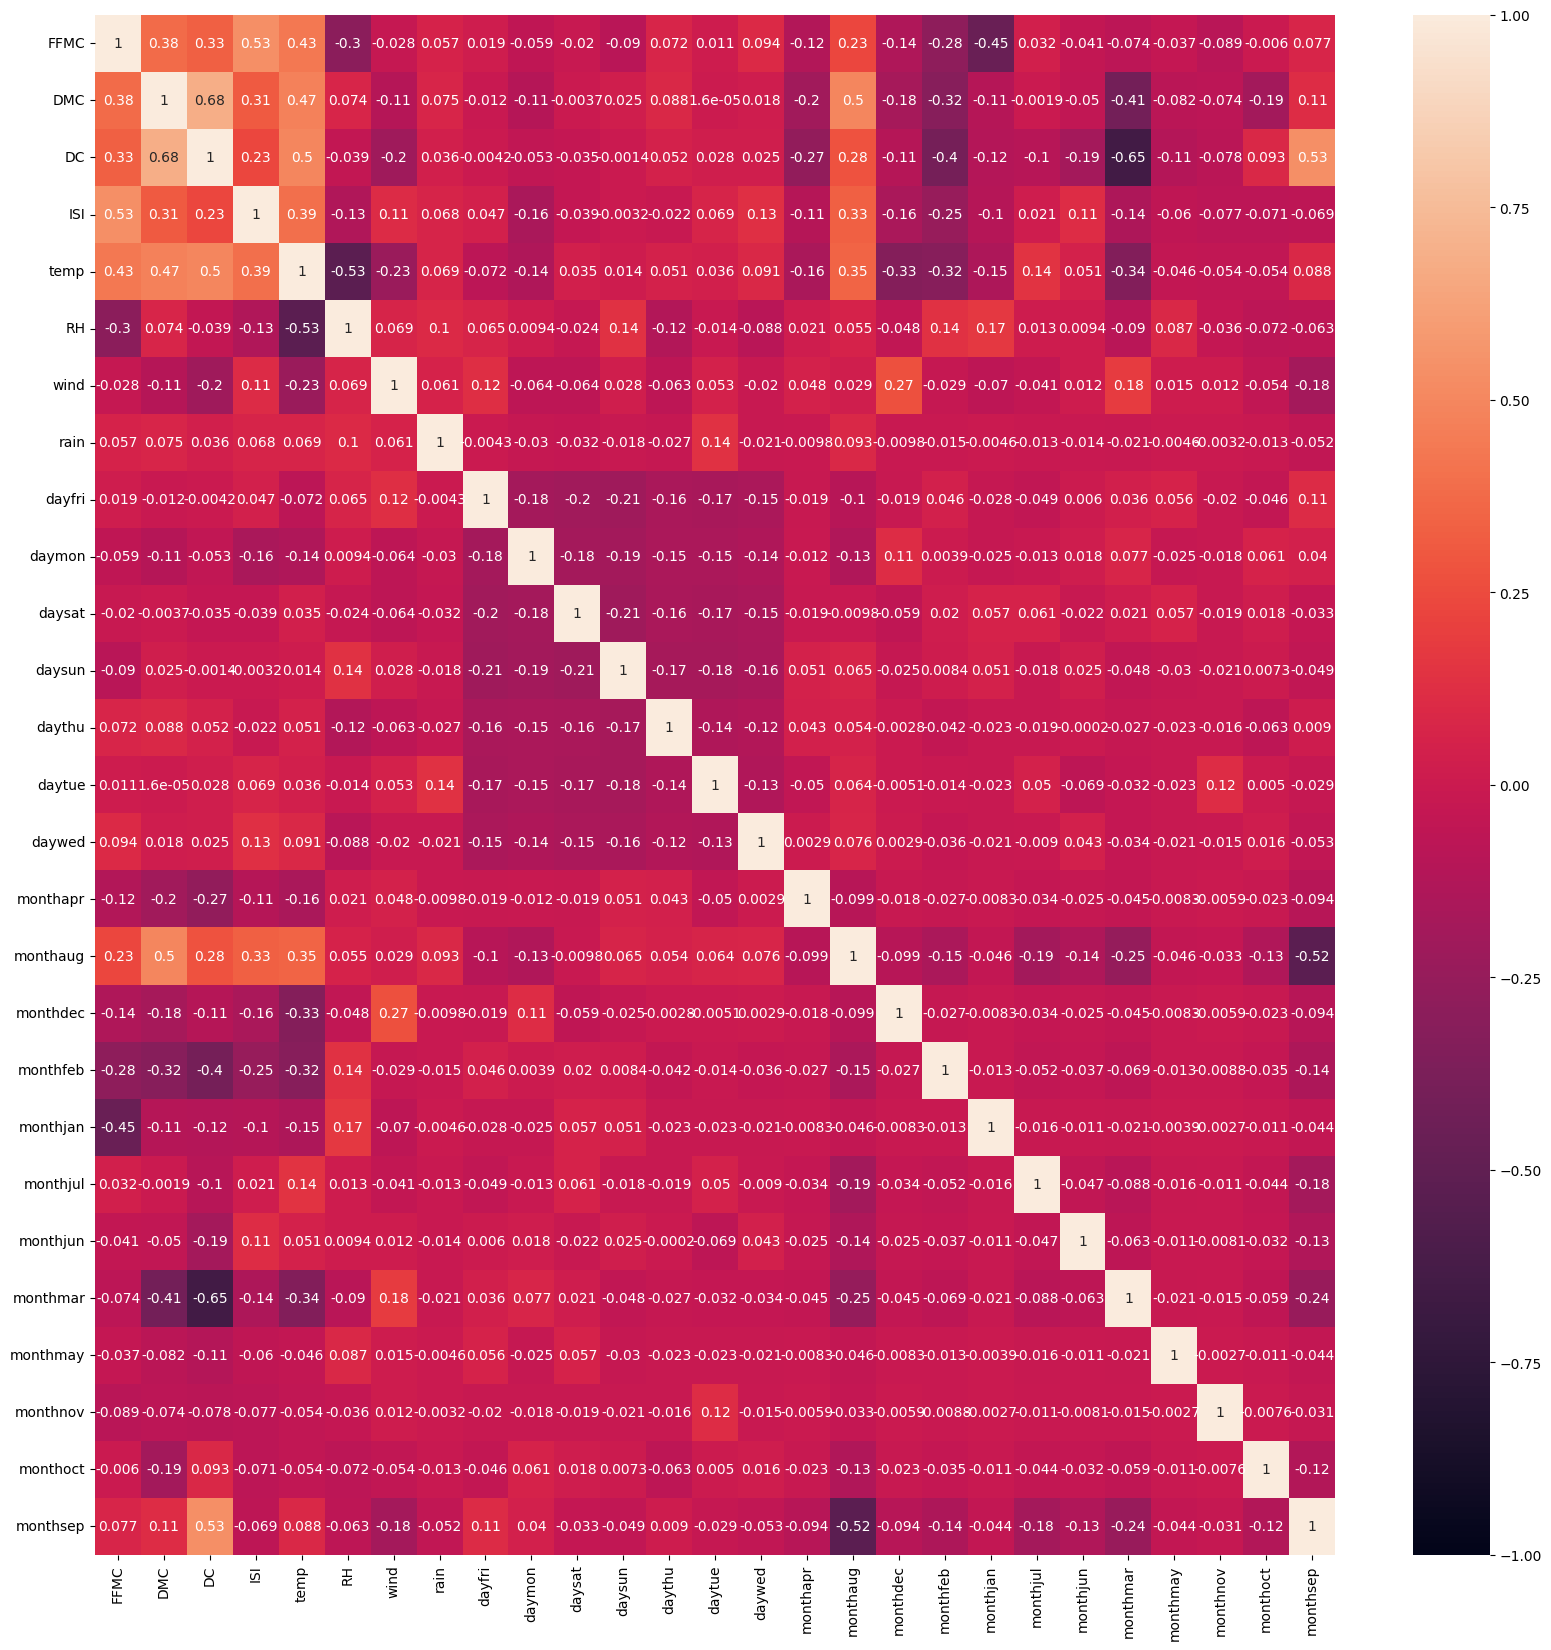

In [12]:
# correlation between the columns
plt.rcParams['figure.figsize']=(20,20)
sns.heatmap((df.corr()),vmin =-1,vmax=1,annot=True)

<Axes: >

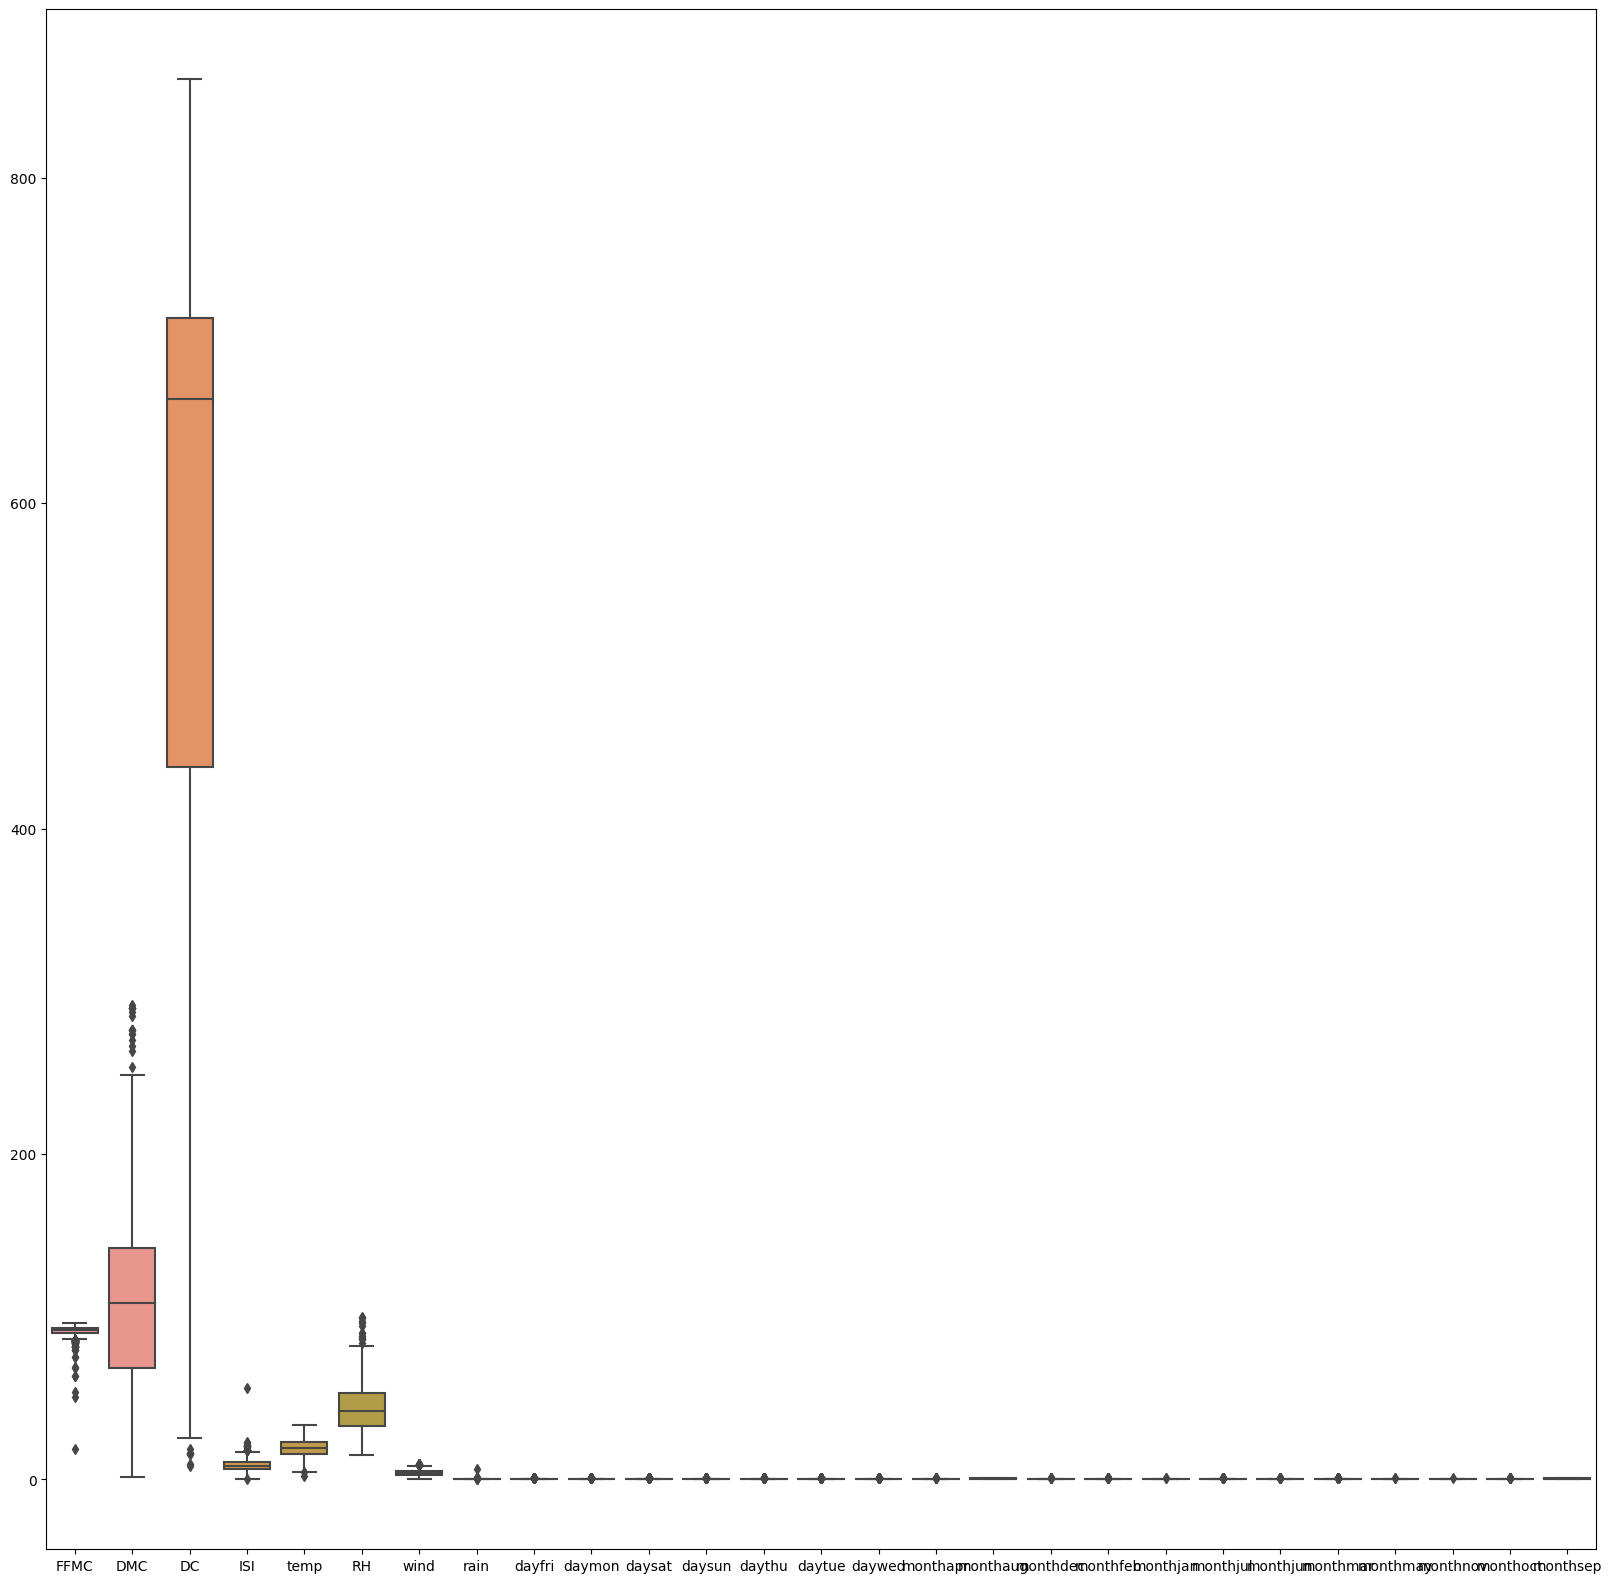

In [13]:
sns.boxplot(df)


# Data splitting

In [14]:
# Data splitting
x = df.iloc[:,:-1]
y = df['size_category']

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [16]:
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [17]:
importances = rf.feature_importances_

In [18]:
# sort feature importance in descending order
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_columns =df.columns[:-1][indices]

Text(0.5, 1.0, 'Feature Importances Analysis using Random Forest')

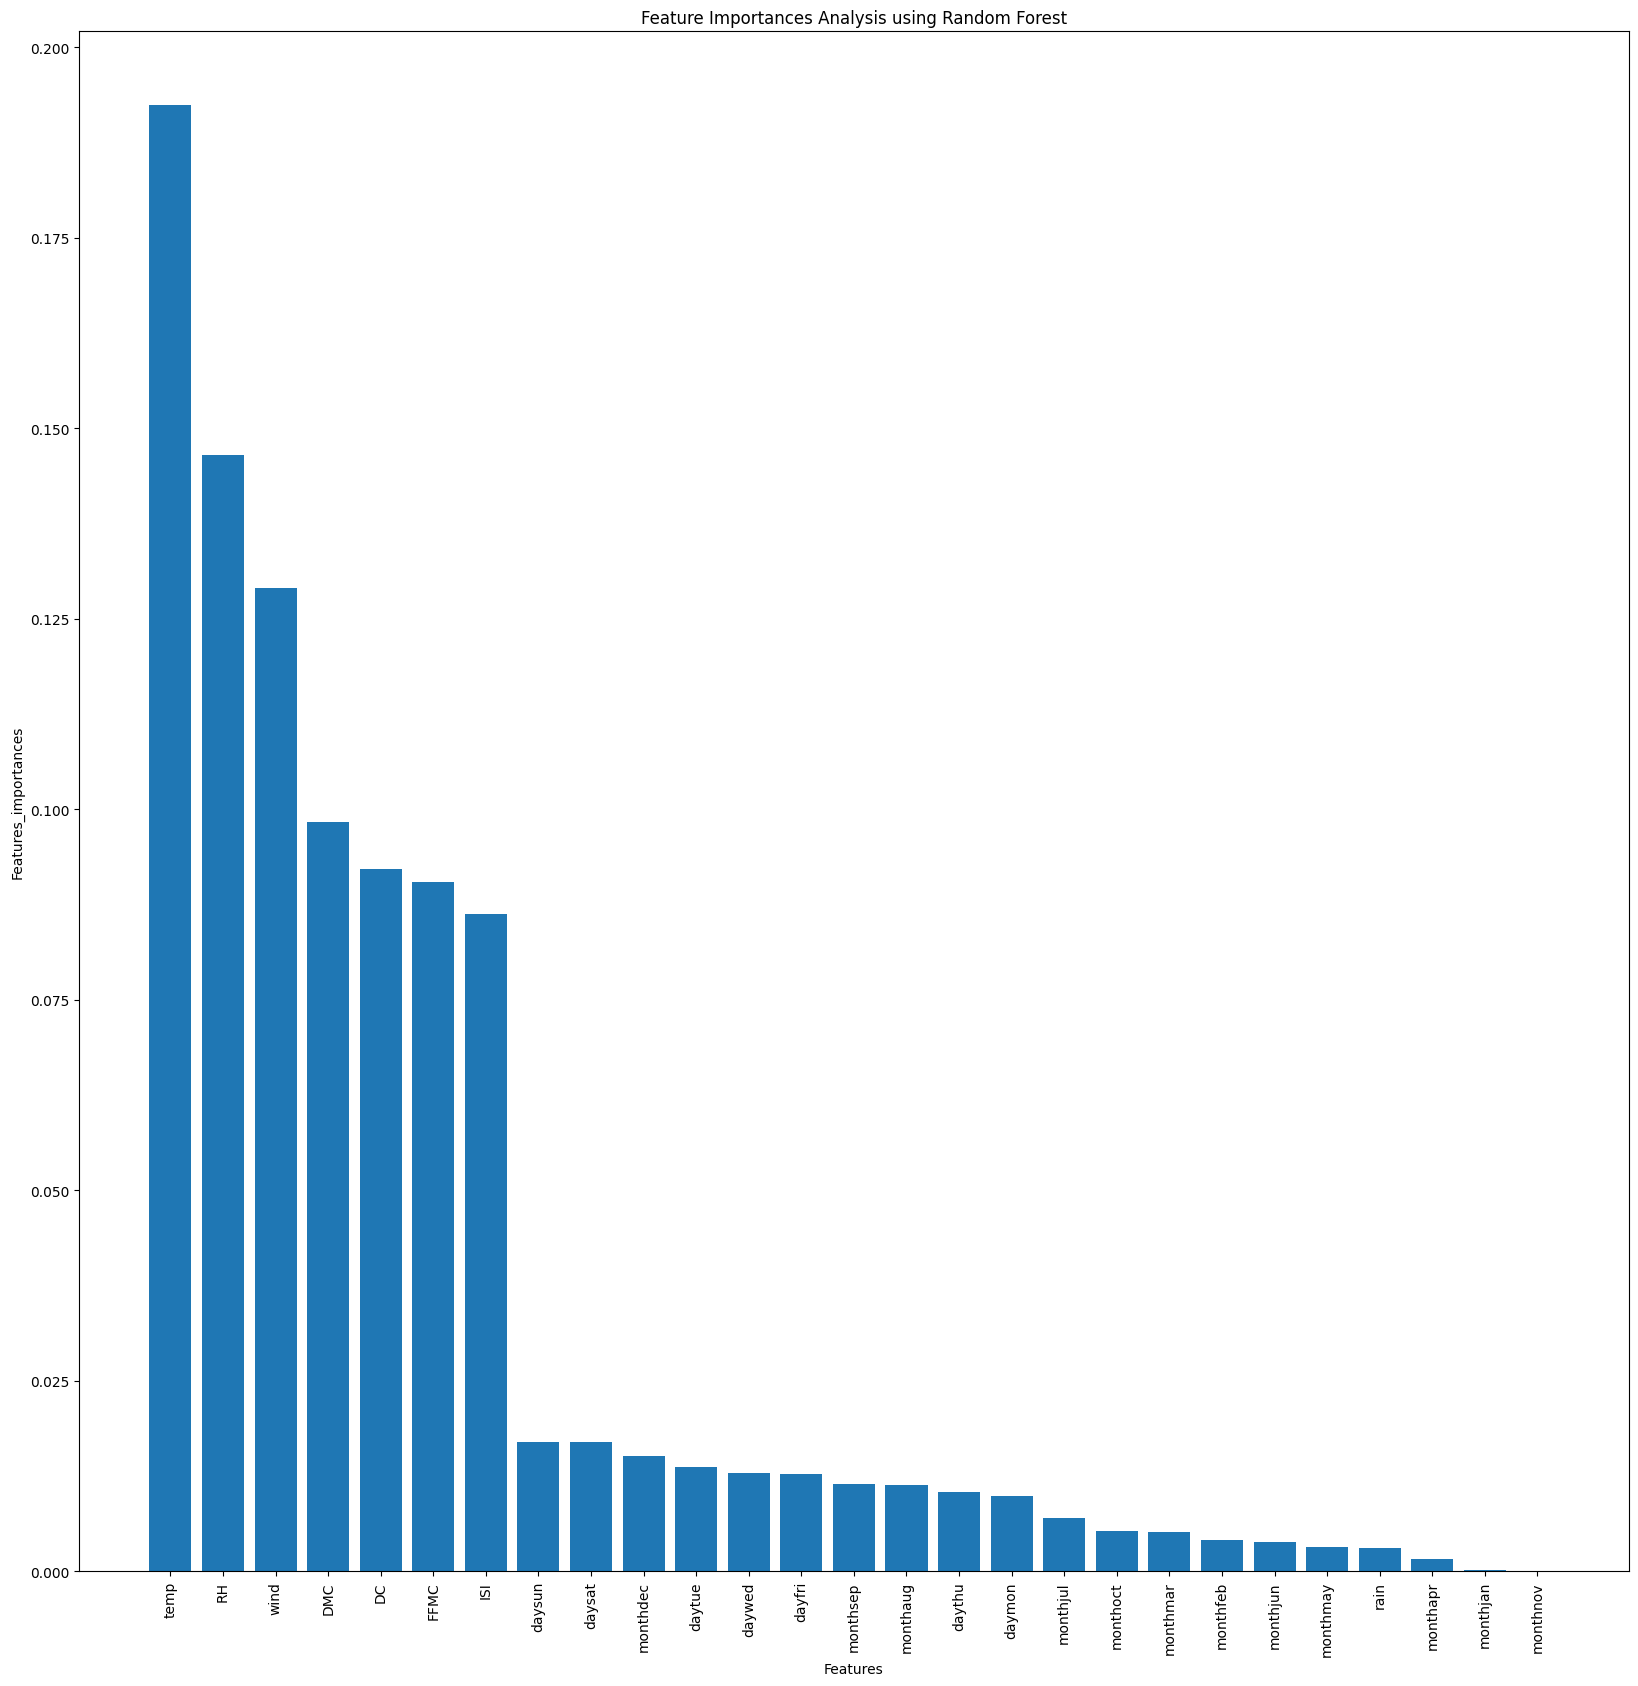

In [19]:
# plotting bar plot for features importances
plt.bar(sorted_columns,sorted_importances)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Features_importances')
plt.title("Feature Importances Analysis using Random Forest")

In [20]:
# feature Scaling
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [21]:
pca = PCA()
pca.fit_transform(x)
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.14027325, 0.21133607, 0.27588334, 0.33091502, 0.38026657,
       0.42870705, 0.47362862, 0.51788364, 0.55986522, 0.600875  ,
       0.6416228 , 0.68131014, 0.71899429, 0.75637893, 0.79271524,
       0.82875203, 0.8634378 , 0.89511017, 0.9264775 , 0.95110678,
       0.97288355, 0.98519845, 0.99442757, 0.99916469, 1.        ,
       1.        , 1.        ])

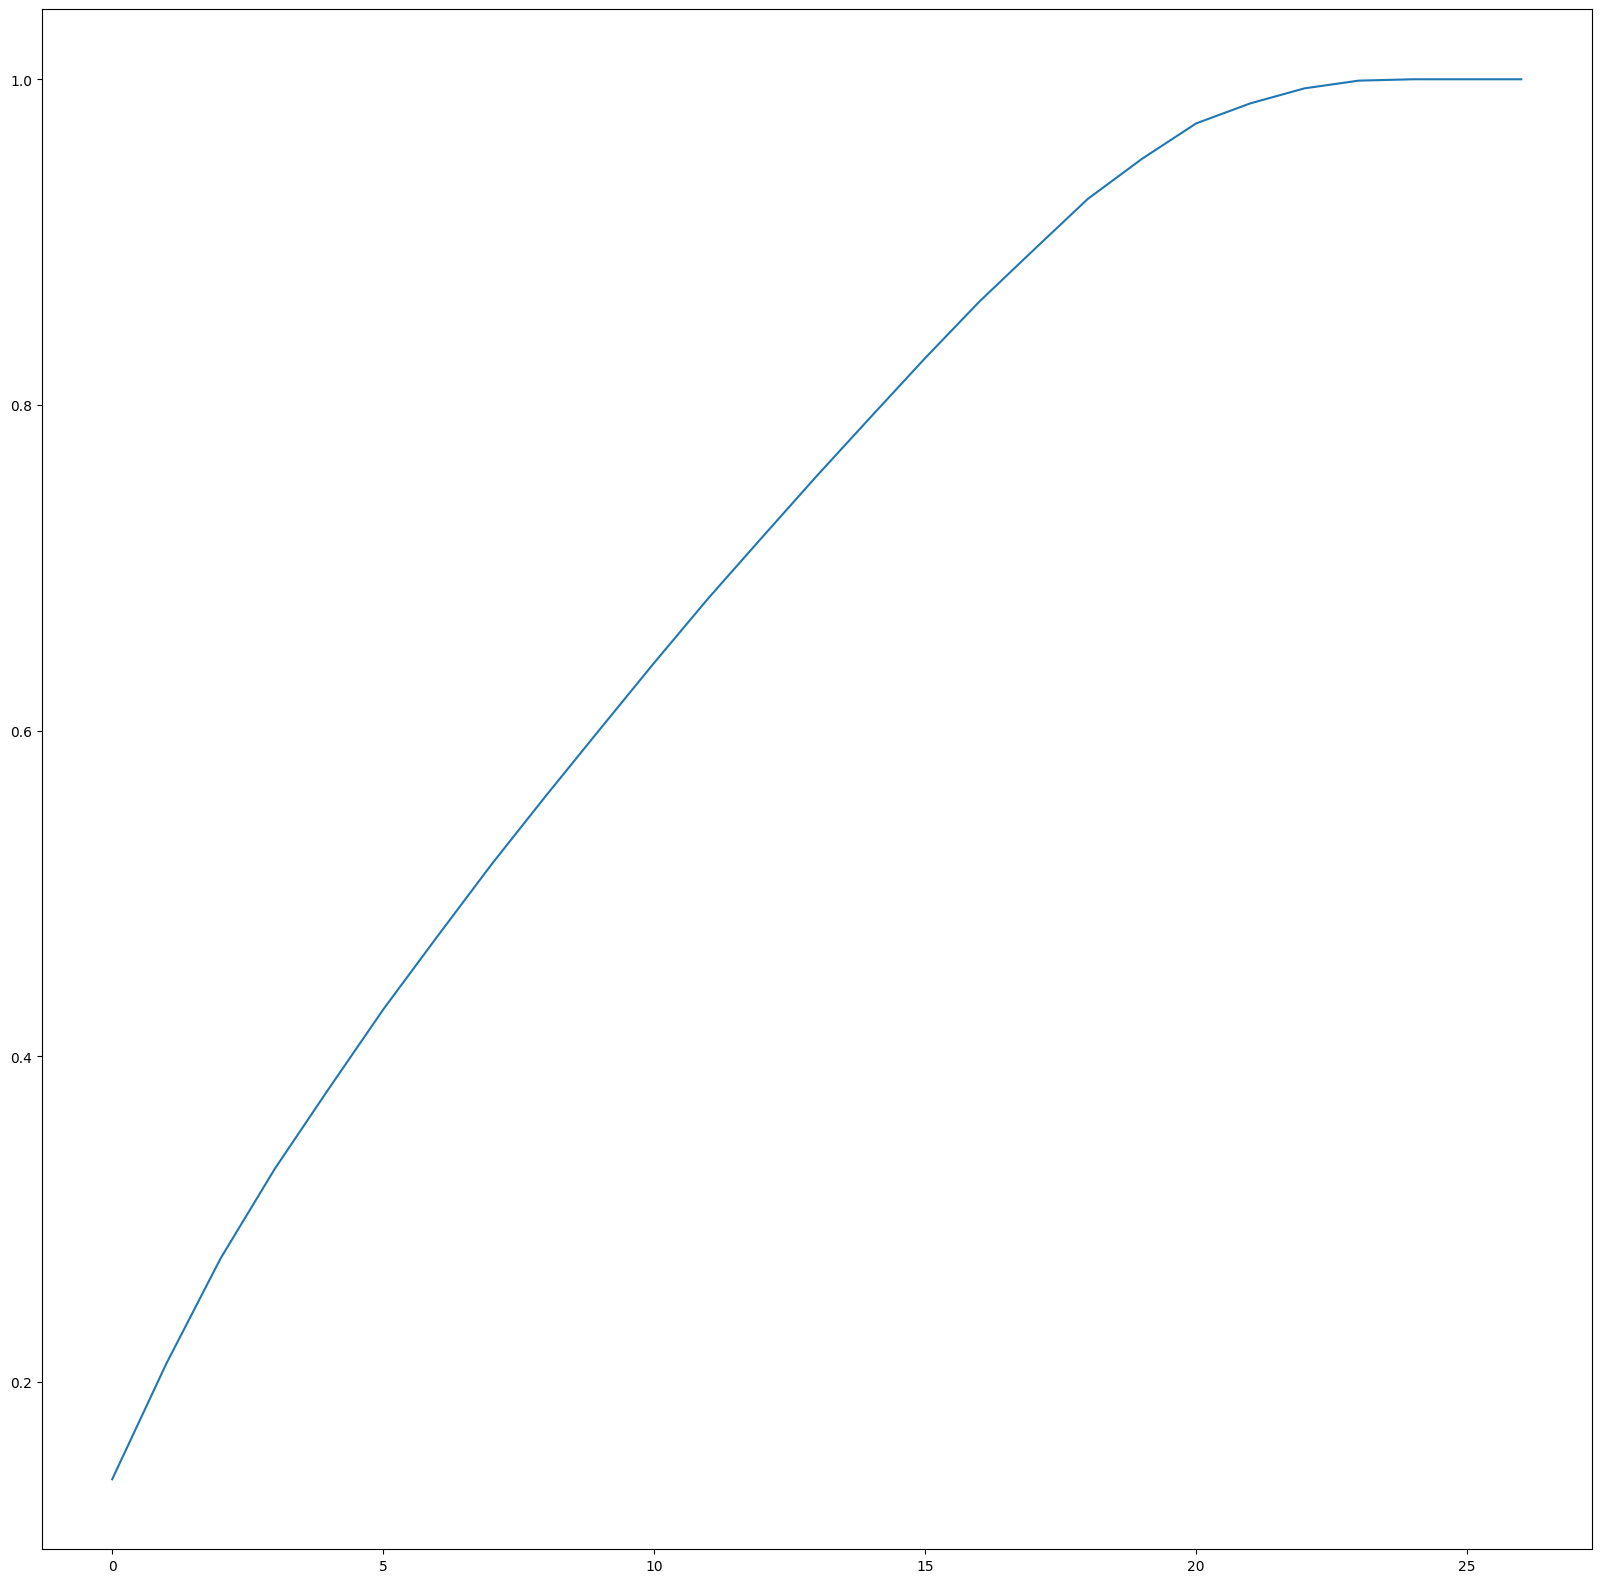

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [23]:
# encode the traget variable
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [24]:
# split tha data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [25]:
xtrain

array([[ 0.04629734,  0.24424129,  0.55910142, ..., -0.04402255,
        -0.17285971,  1.41626761],
       [-0.24383264, -0.93104314, -1.79859958, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [-0.22569952,  2.42758216,  1.03039951, ..., -0.04402255,
        -0.17285971, -0.70608125],
       ...,
       [ 0.19136233, -1.21236122, -1.89826621, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 0.13696295,  0.49273893,  0.21571556, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [-0.11690078, -1.0842052 ,  0.54336458, ..., -0.04402255,
         5.78503817, -0.70608125]])

# Model Building


In [26]:
# Model Building


# initialized the model
ann = Sequential()


# Add hidden layer
ann.add(Dense(units=10,activation='relu'))


# Add output layer
ann.add(Dense(units=1,activation='sigmoid'))


# Established the connection between layers
ann.compile(optimizer='adadelta',loss='binary_crossentropy',metrics='accuracy')


# Fit the data
ann.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 12ms/step - loss: 0.8206 - accuracy: 0.4654
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8206 - accuracy: 0.4654
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8205 - accuracy: 0.4654
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.8205 - accuracy: 0.4654
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8204 - accuracy: 0.4654
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8204 - accuracy: 0.4681
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8203 - accuracy: 0.4681
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8203 - accuracy: 0.4681
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8202 - accuracy: 0.4681
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8202 - accuracy: 0.4681
Epoch 11

In [27]:
# Training Accuracy is 0.4931

In [28]:
# prediction for xtest
ypred = ann.predict(xtest)
ypred
# prediction for xtest is given in probability,for comparison we have to convert it into binary.

5/5 [==============================] - 0s 4ms/step


array([[0.20009927],
       [0.2751086 ],
       [0.7975774 ],
       [0.86389744],
       [0.2383563 ],
       [0.08086041],
       [0.79747224],
       [0.49977547],
       [0.12484802],
       [0.36720407],
       [0.230455  ],
       [0.6992288 ],
       [0.3503205 ],
       [0.38245898],
       [0.5107271 ],
       [0.59562117],
       [0.6404824 ],
       [0.76588553],
       [0.4619195 ],
       [0.10887591],
       [0.7515153 ],
       [0.34939834],
       [0.81696826],
       [0.40603784],
       [0.6857605 ],
       [0.72809047],
       [0.6737435 ],
       [0.68509275],
       [0.4238591 ],
       [0.5215718 ],
       [0.7451724 ],
       [0.3176309 ],
       [0.36963987],
       [0.2964101 ],
       [0.3158788 ],
       [0.6286523 ],
       [0.46130538],
       [0.2380369 ],
       [0.47098848],
       [0.33625674],
       [0.57272077],
       [0.5235533 ],
       [0.54375196],
       [0.3312616 ],
       [0.23169555],
       [0.31756732],
       [0.19400963],
       [0.431

In [29]:
# for binary prediction
ypred = ypred>0
ypred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [30]:
# testing Accuracy
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.74      1.00      0.85       116

    accuracy                           0.74       156
   macro avg       0.37      0.50      0.43       156
weighted avg       0.55      0.74      0.63       156



### Training accuracy of model using sigmoid optimizer is 0.4931 and testing accuracy is 0.74 .Variation between training and testing is greater than 5 so ,we can say that it is overfitted model.

# HYperparameter Tuning

In [33]:
! pip install -U keras-tuner

In [34]:
import keras_tuner as kt

In [35]:
def optimizer_selection(hp):
    #initialize the model
    model = Sequential()
    #Add hidden layer
    model.add(Dense(units=10, activation='relu'))
    #Add output layer
    model.add(Dense(units=1, activation='sigmoid'))
    #Optimizer selection
    optim = hp.Choice('optimizer', values = ['sgd','adam','rmsprop'])
    model.compile(optimizer=optim, loss = 'binary_crossentropy', metrics = 'accuracy')
    return model

In [36]:
tuner = kt.RandomSearch(
    optimizer_selection,
    objective = 'val_accuracy',
    max_trials=3
)

In [40]:
tuner.search(xtrain,ytrain, epochs = 3, validation_data = (xtest,ytest))

In [38]:
tuner.get_best_hyperparameters()[0].values

{'Optimizer': 'adam', 'optimizer': 'sgd'}

In [39]:
model1 = tuner.get_best_models(num_models=1)[0]
model1.fit(xtrain,ytrain, epochs = 100, validation_data = (xtest,ytest))

Epoch 1/100
12/12 [==============================] - 1s 31ms/step - loss: 1.2118 - accuracy: 0.2742 - val_loss: 1.1379 - val_accuracy: 0.2628
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1055 - accuracy: 0.2825 - val_loss: 1.0460 - val_accuracy: 0.2821
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0168 - accuracy: 0.2881 - val_loss: 0.9691 - val_accuracy: 0.2949
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9429 - accuracy: 0.3047 - val_loss: 0.9054 - val_accuracy: 0.3269
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8821 - accuracy: 0.3546 - val_loss: 0.8547 - val_accuracy: 0.3333
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8334 - accuracy: 0.3906 - val_loss: 0.8138 - val_accuracy: 0.4167
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7942 - accuracy: 0.4072 - val_loss: 0.7786 - val_accuracy: 0.4551
Epoch 8/100


 ### After hyperparameter tuning model has given training accuracy 0.7507 and testing accuracy 0.7564 ,variatuin between the testing and traing is less than 5 so it is a generalised model.